# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-1b:)
- [code for plots](#Code-for-plots)

# Session 10:
## Machine learning introduction

*Andreas Bjerre-Nielsen*

# Introduction to modelling

## Where we are

Recall the wheel of data science - we are now at the "model" part

<br>
<br>
<center><img src='https://raw.githubusercontent.com/hadley/r4ds/master/diagrams/data-science.png' alt="Drawing" style="width: 1000px;"/></center>


## Agenda

1. [Introduction to modelling](#Introduction-to-modelling)
1. [Measuring model performance](#Measuring-model-performance)
1. [Machine learning overview](#Machine-learning-overview)
1. [Supervised machine learning](#Supervised-machine-learning)
    1. [the perceptron](#The-perceptron-model)
    1. [simple model validation](#Simple-model-validation)
    1. [beyond the perceptron](#Beyond-the-perceptron)

## Taking stock

*What have we learned until now?*
- Fundamental data types, functions, containes, loops
- Pandas: DataFrame, Series - these contain basic datatypes
    - A lot of powerful tools in methods/functions
    - E.g. groupby, join/merge
- Scraping: API, HTML, and a lot more

## Function fitting
*What does (supervised) machine learning do?*

Suppose we have some data $y$ we want to model/predict from input $x$.  

The aim is to find a function $f$ such that the distance between actual values $y$ and predicted values $f(x)$ are minimized.

## Why modelling

Why not stop at visualization? Model allows us to:
- get qualified answer about hypothesis using statistics, i.e. causal inference and policy evaluation
- predict things, e.g. sales tomorrow, spread of epidemics, weather

## Different purposes with models


Models are pursued with differens aims. Suppose we have a linear model, $y=x\beta+\epsilon$.

- Social science:
    - They teach us something about the world.
    - We want to estimate $\hat{\beta}$ and distribution
- Data science:
    - To make optimal future decisions and precise predictions, i.e. $\hat{y}$.    

## Examples of modelling 


- Linear form: $y=x^T\beta$.
- Non-linear form: $y=g(x^T\beta)$, e.g. $g$ is a logistic function

where $x^T\beta=\beta_0+x_1\beta_1+x_2\beta_2+...+x_n\beta_n$ (vector dot product)

where $x,\beta$ a vector is 1-dimensional array of numbers, e.g.
\begin{align}\boldsymbol{x}=[x_0,x_1,x_2,..,x_n]\end{align}



# Measuring model performance

## A flexible model
*What is a polynomial regression?*

- Fitting a curve with an *n-dimenstional polynomial*
- Can fit any "regular" curve ~ Taylor Series Approximation.

## In-sample performance increases in order
*Suppose we build models of the size of the Danish population, how do polynomial fits perform?*
- We estimate model with data from 1769-1975.

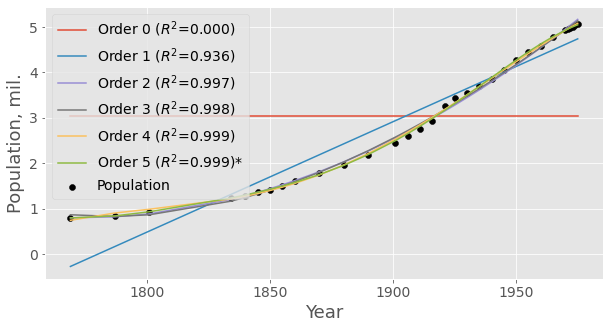

In [3]:
f_pop1

## Out-of-sample performance does not increase
*Which model performs best when we extend the forecasting period from 1975 to now?*

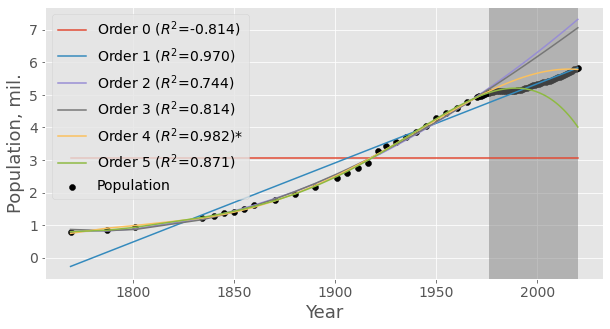

In [4]:
f_pop2

## Model fragility
*What happens if we extend the prediction period until 2050? See the fifth order.*

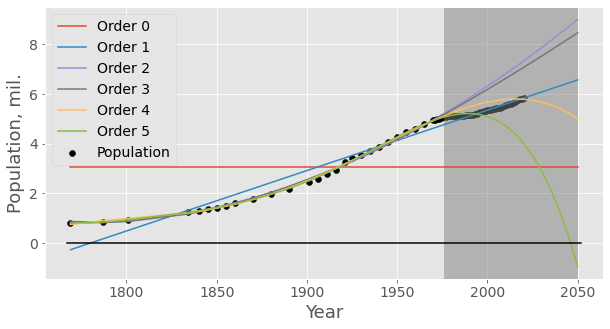

In [5]:
f_pop3

## The modelling dilemma
*What trade off do we face in modelling?*

- Making a model that is too simple and does not capture enough patterns in data (`underfitting`)
- Making a model with great fit on estimation data, but poor out-of-sample prediction (`overfitting`)
    

- In the previous example underfitting is when model is too simple, i.e. only a intercept/constant (order 0).
- In the previous example overfitting is when model is too complex, i.e. too high order polynomial (order 5,) 

The goal of **machine learning** is to find models that minimize these two problems simultaneously.

# Machine learning overview

## What is machine learning
*Can you define machine learning, i.e. ML?*

- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data.      
  - We define the `target` as labels in data we wish to model. 
      - Example: population as a function of year. 
- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data. 
  - This may involve clustering, dimensionality reduction and more.  
  - *Not part of the course*.

## Machine learning  for us
*How might this be useful for social scientists?*

Supervised machine learning is important (elaborated in Lecture 14):
- Improve estimation by validating models (not only theory)
- We can generate new data (impute missing)
- Better predictive models (finance, macro, demography/education, combat fraud)
- Use in hybrid models that leverage machine learning for causal estimation 
    - (e.g. causal forest, neural instrumentation)

## Machine learning outline for this course 

ML: short for machine learning

- Problems: ***supervised*** vs unsupervised
- Linear supervised ML models 
    - classification and regression
    - regularization 
    - **getting hands dirty with implementing solver**
- Fundamental concepts of ML
    - overfitting, underfitting, model validation
    - model selection and hyperparameters
- Emphasize differences and synergies between ML and statistics
- Brief intro of non-linear models

# Supervised machine learning

## Supervised machine learning (ML) problems 
*How can we categorize a supervised ML model?*


Suppose we have model $y=x^T\beta$

We distinguish by type of the `target` variable `y`:
- **regression**: predict a numeric value
- **classification**: distinguish between target categories (non-numeric data)

## Supervised ML problems (2)
*Which one is classification, which one is regression?*

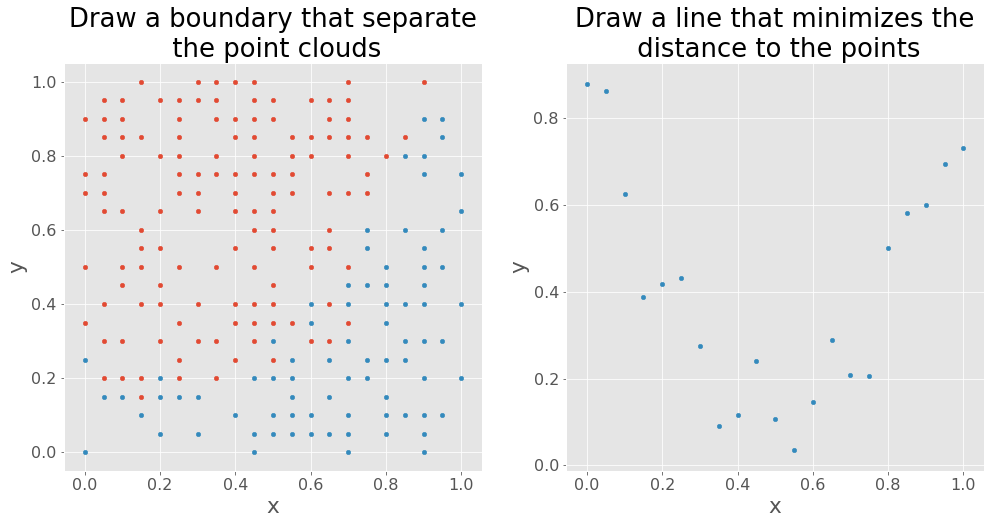

In [28]:
f_identify_question

## Supervised ML problems (3)

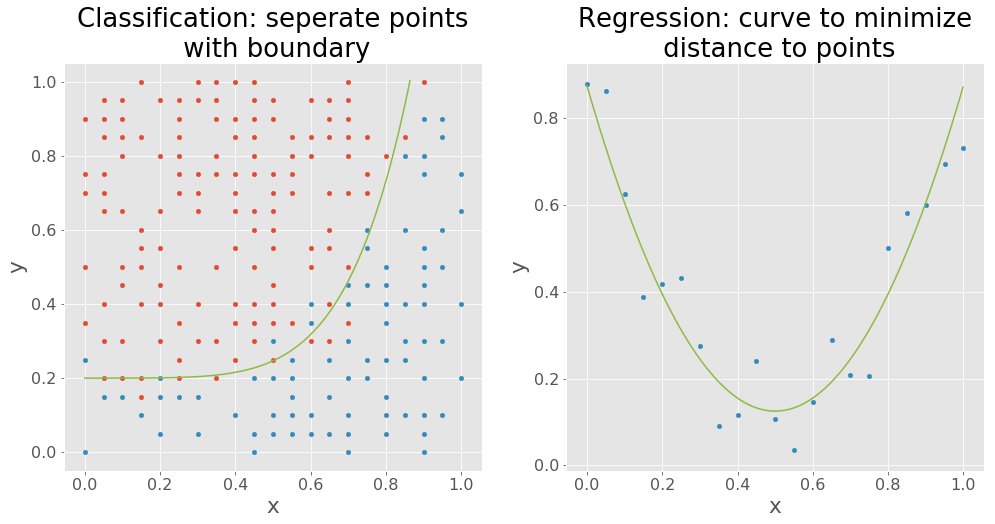

In [29]:
f_identify_answer

## Regression models
*What are examples of regressions models?*

- Example of targets: income, life expectancy, education length (years)

*What is the underlying data of the target, $y$?*

- target is `continuous` 

## Classification models
*What are examples of classification models?*

Target, `y`, are categories 
- Examples of target: kind of education (linguistics, math), mode of transportation
    - sometimes known as `factor` in statistics 
- (work for `str`, `bool`,  `int`, `float` which are then interpreted as categories)


## Example of supervised ML
*Classification or regression?*

We load the titanic data. We select variables and make dummy variables from categorical. We split into target and features. 

Target is: ...?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)  

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

## Definitions

ML lingo and econometric equivalents (in italic)

- `feature` vector, $\textbf{x}_i$, i.e a row of input variables
  - = explanatory *variables* in econometrics
- `weight` vector, $\textbf{w}$, i.e model parameters
  - = *coefficients* in econometrics where denoted $\beta$
- `bias` term, $w_0$, i.e. the model intercept
  - = the *constant* variable in denoted $\beta_0$
  

# The perceptron model 

## The articifial neuron

*A simple classication model*

A real neuron maps stimulus (input) to output. 

[Research estimates](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5063692) there are 55–70 billion neurons in the brain.
<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_01.png' alt="Drawing" style="width: 900px;"/></center>


## Model archicture
*From input to output*

We are interested in making a decision rule that takes arbitrary input and outputs either positive or negative. 


Mathematically we define this map as $\phi: \mathbb{R}^p\rightarrow\{-1, 1\}$.

\begin{align}
\phi(z_i)=\begin{cases}
\hfill1, & z_i>0\\
-1, & z_i\le0
\end{cases}
\end{align}

- `net-input`, $z_i = \underset{~vector\,form}{\underbrace{\boldsymbol{w}^{T}\boldsymbol{x}_i}} = \underset{~expanded\,form}{\underbrace{1\cdot w_0+w_1x_{i,1}+...+w_kx_{i,k}}}$

- `unit step function`, $\phi$, checks if value exceeds threshold


## Quiz
What are the input dimensions of the neuron, what is the output dimension?

- Input is the p-dimensional space, $\mathbb{R}^p$.
- Output is binary, either $-1$ or $1$.

## Visualizing the decision boundary
*The unit step function (left) and the decision boundary (right)*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_02.png' alt="Drawing" style="width: 1000px;"/></center>


## A good model?
*When does the articial neuron work?*


If the two target types are linearly separable:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_03.png' alt="Drawing" style="width: 1200px;"/></center>


## Computing model weights
*How do we estimate the model parameters?*

Step 1. initialize the weights,  $\hat{w}$, with small random numbers

Step 2. for each (training) observation, i=1, .., n
  1. compute predicted target, $\hat{y}_i$
  1. update weights $\hat{w}$ based on perceptron rule (explanation follows)
  

## Predicted target
*How do we compute the predicted target $\hat{y}$?*

We apply a transformation on the net-input :
- single observation, expanded notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=w_0+w_1x_{i,1}+...+w_kx_{i,k}
\end{align*}

- single observation, vector notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=\boldsymbol{w}^{T}\boldsymbol{x}_i
\end{align*}


- multiple observations, matrix notation:
\begin{align*}
\hat{\boldsymbol{y}}= & \phi(\boldsymbol{z}),\quad\boldsymbol{z}=\boldsymbol{X}\boldsymbol{w}
\end{align*}

## The perceptron learning rule
*How do we update weights?*

Weights are updated as follows with one observation:
\begin{align*}
w_i&=w_i+\Delta w_i\\
\Delta w_i&=\eta\cdot(y_i-\phi(z_i))\cdot \textbf{x}_{i}\end{align*}

where $\eta$ is the learning rate

If multiple observations we can use vector notation:
\begin{align*}
w&=w+\Delta w\\
\Delta w&=\eta\cdot (y-\phi(z))^T X\end{align*}

## Overview of perceptron learning rule 

The computation process

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_04.png' alt="Drawing" style="width: 1000px;"/></center>


## Implementation in Python (1)
*Let's set some values of input and output* 

In [3]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(size=(3)) # weight vector
print('X:\n',X)
print('y:',y)
print('w:',w)

X:
 [[ 0.46858573 -0.53676988]
 [ 0.42104924  1.94894623]
 [-0.95443907  0.10743534]]
y: [ 1 -1  1]
w: [1.30321973 0.02313069 0.67071165]


## Implementation in Python (2)
*How do we compute the errors vectorized?* 

In [4]:
# compute net-input 
z = w[0] + X.dot(w[1:]) # (w[0]: bias, w[1:]: other weights, X: features)

# unit step-function
positive = z>0 # compute prediction (boolean)
y_hat = np.where(positive, 1, -1)  # convert prediction

# compute errors
e = y - y_hat # compute errors

## Implementation in Python (3)
*How do we compute the updated weights?*

In [5]:
# learning rate
eta = 0.001 

# update weights 
update_vars = eta*X.T.dot(e) 
update_bias = eta*e.sum()/2

## Working with the perceptron (1)
We load the iris data.

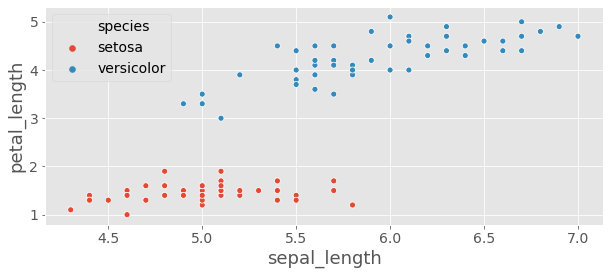

In [9]:
iris = sns.load_dataset('iris').iloc[:100] # drop virginica
sns.scatterplot(iris.sepal_length, iris.petal_length, hue=iris.species)

Features and target

In [7]:
X = iris.iloc[:, [0, 2]].values # keep petal_length and sepal_length
y = np.where(iris.species=='setosa', 1, -1) # convert to 1 for setosa, -1 for versicolor

## Working with the perceptron (2)
*How do we fit the perceptron model?* (load perceptron code [here](#Code-from-Raschka-2017)). 

In [10]:
# initialize the perceptron 
clf = Perceptron(n_iter=10) 
# clf: short for classifier (classification model), 
# n_iter: number of times to run through all observations

# fit the perceptron (estimate the model)
# runs 10 iterations of updating the model
clf.fit(X,y)

## Working with the perceptron (3)
*How can we evaluate the model??*

Number of errors: 0


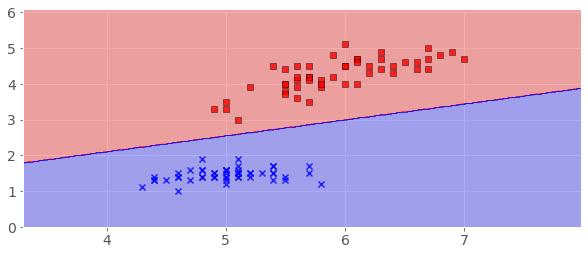

In [11]:
print('Number of errors: %i' % sum(clf.predict(X)!=y))

# we plot the decisions
plot_decision_regions(X,y,clf)

## Working with the perceptron (4)
*How does the model performance change??*

Text(0, 0.5, 'Number of errors')

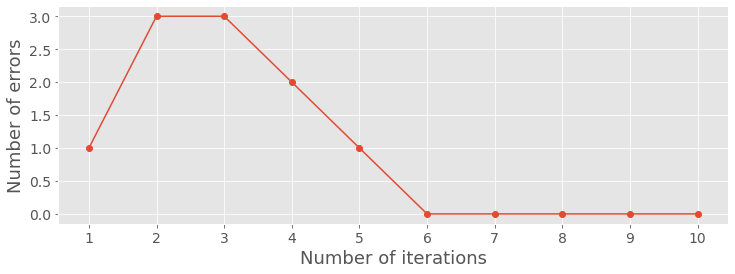

In [83]:
f,ax = plt.subplots(figsize=(12, 4))
ax.set_xticks(range(11))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Number of errors')

# Simple model validation

## Model validation
*How can we see how our model generalizes?*

We can simulate out-of-sample prediction. How?



- Idea: Use some of our sample for model evaluation.
- Implementation - divide data randomly into two subsets:
    - `training data` for estimation; 
    - `test data` for evaluation.
- Note: does not work for time series.



## Random partitioning
We revert to titanic, `y`: survived, `X`: everything else

In [6]:
print(titanic_sub.head(3))
X = titanic_sub.drop('survived', axis=1).values
y = titanic_sub.survived.replace(0,-1).values

   survived  sibsp  age  alone  class_Second  class_Third  sex_male
0         0      1   22      0             0            1         1
1         1      1   38      0             0            0         0
2         1      0   26      1             0            1         0


We split the data into test and training samples

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

## The value of training
We revert to titanic, `y`: survived, `X`: everything else

In [ ]:
for n in [1,10,100, 1000]:
    clf2 = Perceptron(n_iter=10) 
    clf2.fit(X_train, y_train)
    acc = np.mean(y_test-clf2.predict(X_test)==0)
    print(n, acc)

# Beyond the perceptron

## Motivation
*What might we change about the perceptron?*

1. Change from updating errors that are binary to continuous
2. Use more than one observation a time for updating

## The activation function (1)
*What else might we use to update errors?*

- The most simple is **no transformation** of the net-input, i.e. $\phi(z_i)=z_i$.

- When we change this from perceptron we call it Adaptive Linear Neuron (**Adaline**).

## The activation function (2)
*How is this different from the Perceptron?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_09.png' alt="Drawing" style="width: 800px;"/></center>


## The activation function (3)
*Which activation functions can be used?*

- Linear 
- Logistic (Sigmoid)
- Unit step, sign

See page 450 in Python for Machine Learning.

## The activation function (4)
*How do Adaline and Logistic regression differ?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_03.png' alt="Drawing" style="width: 800px;"/></center>


## A new objective (1)
*The update rule in perceptron seems ad hoc, is Adaline more general?*

- Yes, we minimize the sum of squared errors (SSE). The SSE for Adaline is:
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}=e_1^2+..+e_n^2\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

*Doesn't the above look strangely familiar?*

- Yes, it is the same objective as OLS. The difference:
    - OLS computes the exact solution 
        - using system of equations from first order conditions.
    - We make an approximate solution.

## A new objective (2)
*So how the hell do we make the approximate solution?*

- Two general classes:
  -  We approximate the first order derivative ~ gradient descent (GD)
  -  We approximate both first and second order derivative ~ quasi Newton    
 <br />
- We take gradient descent 
   - much simpler and available for more models
   - one disadvantage is that it is slower

## A new objective (3)
*How does a gradient descent look?*

An algorithm that finds the direction where expected differences are largest. Attempt of satisfying first order condition (FOC).

<center><img src='https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png' alt="Drawing" style="width: 500px;"/></center>


## A new objective (4)
*What is the first order derivative of SSE wrt. weights in Adaline?*

\begin{align}\frac{\partial SSE}{\partial w}=\textbf{X}^T\textbf{e},\end{align}


*How do we update with GD in Adaline?*

  - Idea: take small steps to approximate the solution.

  - $\Delta w=-\eta\textbf{X}^T\textbf{e}=-\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})$

## A new objective (5)
The gradient descent algorithm we just learned uses the whole data.

- Often known as batch gradient descent.

*What might be a smart way of changing (batch) gradient descent?*

- We only use a subset of the data. Two variants:
    - *stochastic gradient descent* (SGD): uses random subset of observations
    - *mini batch*: uses deterministic subset of observations (loop whole dataset)
    
- Idea: we converge faster by computing update for subset of data
    - Note: we may need a million repetitions.

## Applying logistic regression
*How difficult is it to use `LogisticRegression`?*

Very easy:

In [13]:
from sklearn.linear_model import LogisticRegression

# estimate model on train data, evaluate on test data
clf = LogisticRegression(solver='lbfgs') # note try default values
clf.fit(X_train,y_train) # model training
y_hat = clf.predict(X_test)
ß
print('Model accuracy is:', np.round(accuracy,3))

Model accuracy is: 0.793


# The end
[Return to agenda](#Agenda)

# Code for plots

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Population plots

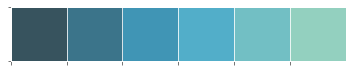

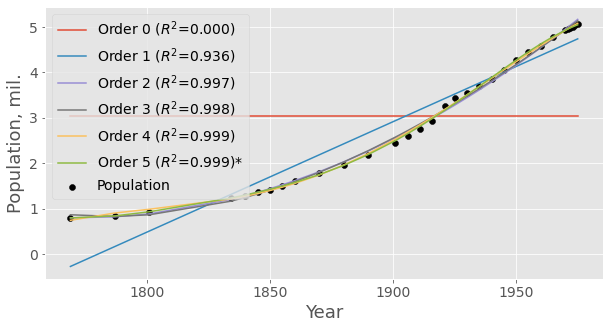

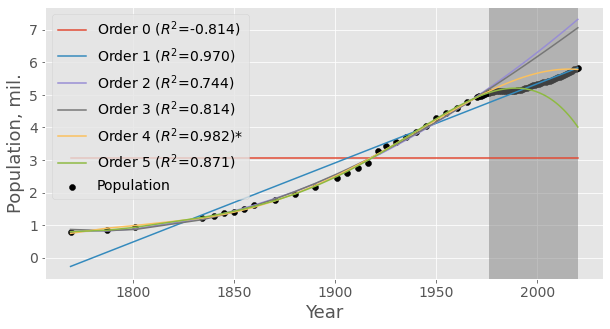

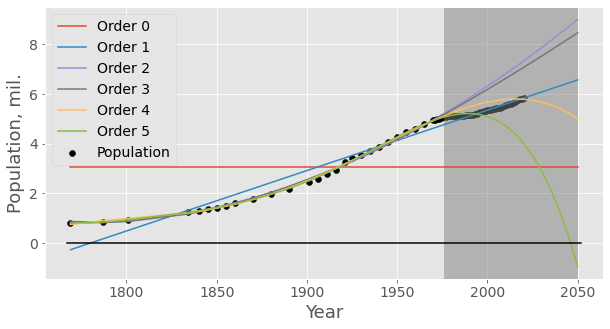

In [2]:
%run pop_plots.ipynb

### Plots of ML types

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


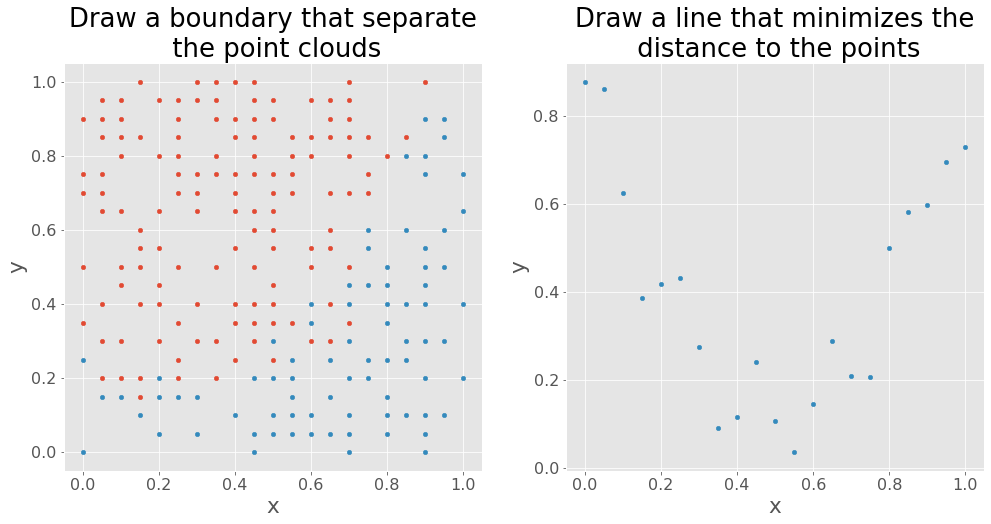

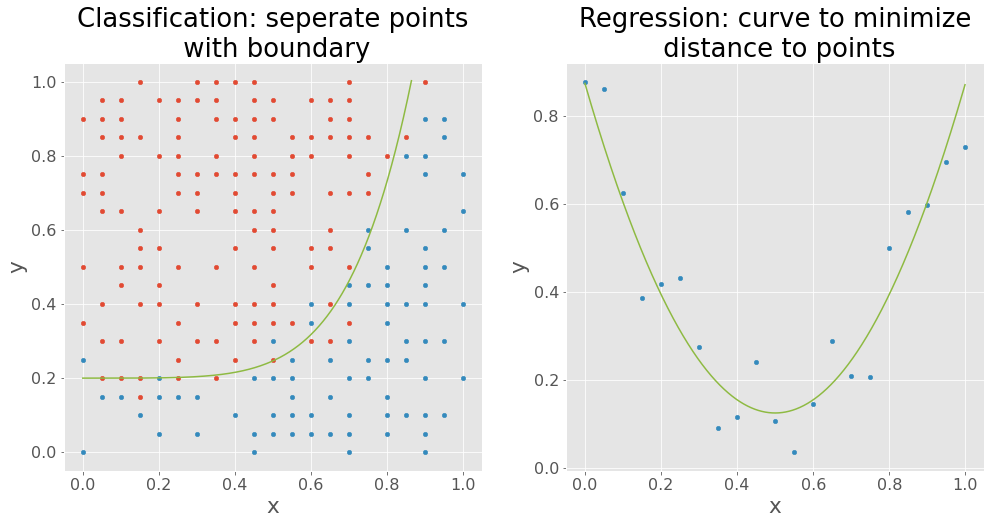

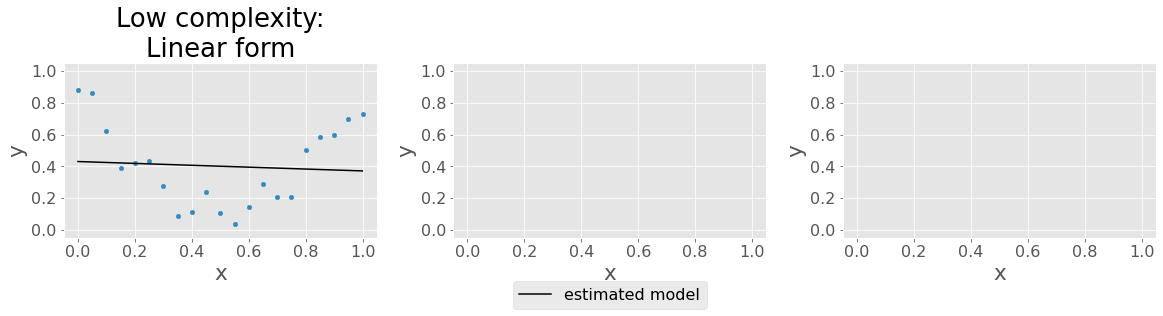

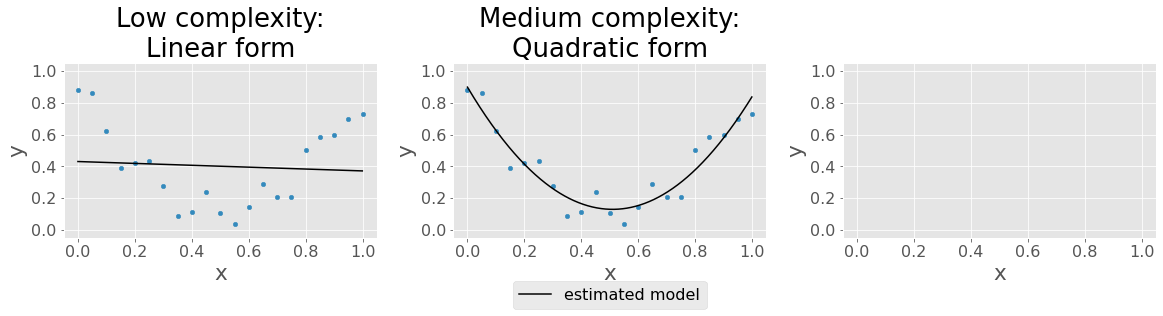

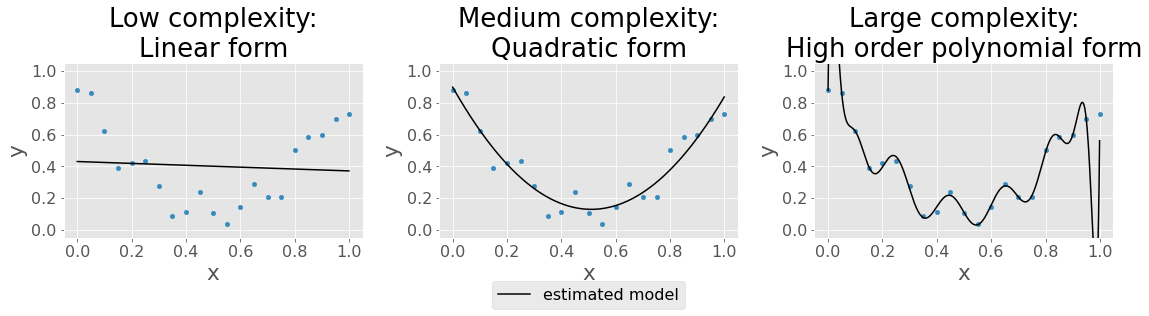

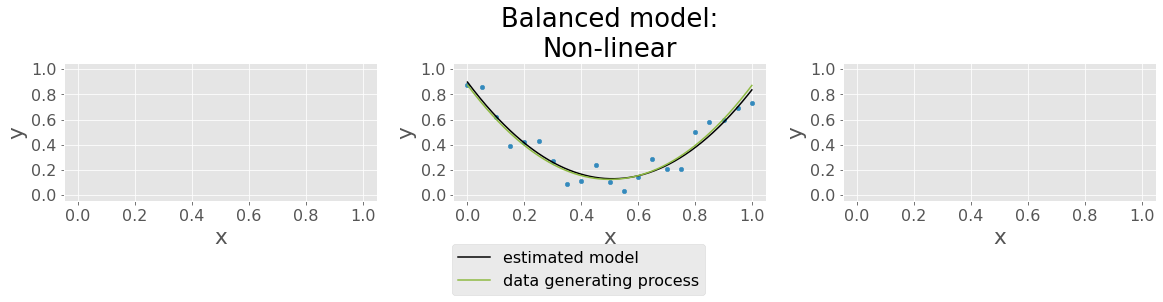

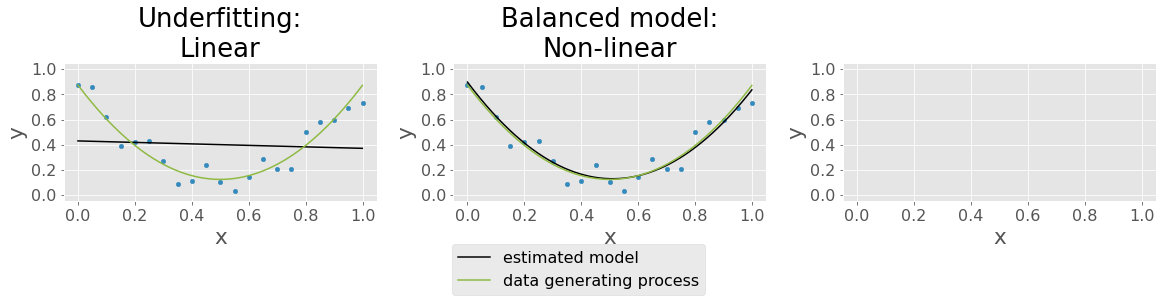

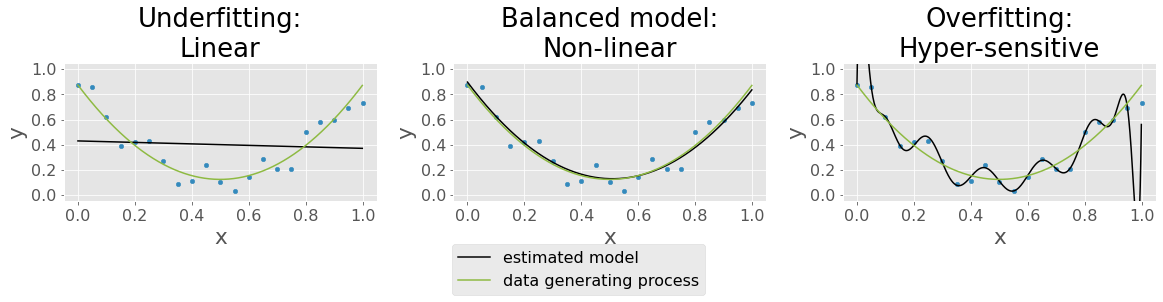

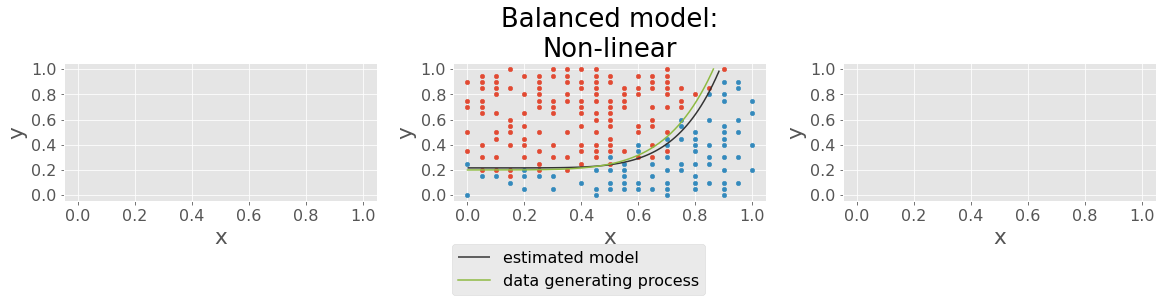

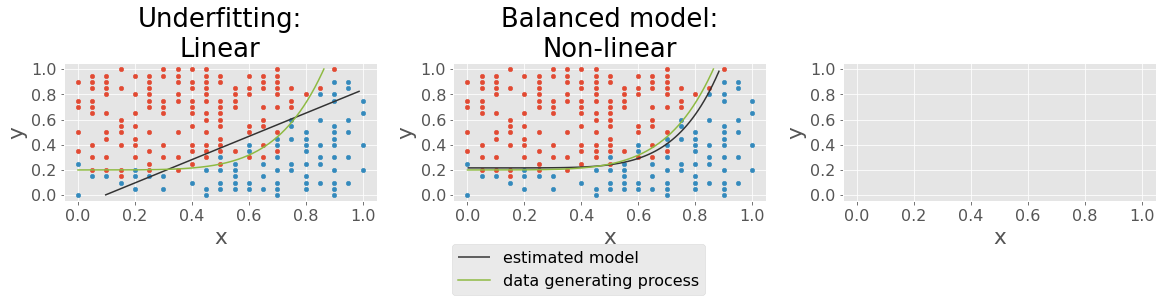

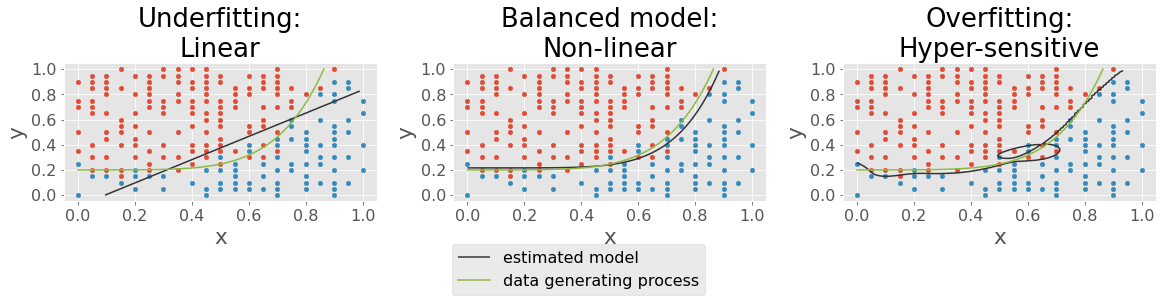

In [16]:
%run ../ML_plots.ipynb

### Code from Raschka 2017

In [2]:
import requests
import os
base_url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch02/'

for filename in ('ch02.py', 'iris.data', 'iris.names.txt'):
    if not os.path.exists(filename):
        response = requests.get(base_url+filename)
        with open(filename,'wb') as f:
            f.write(response.text.encode('utf-8'))
    
from ch02 import Perceptron, AdalineGD, AdalineSGD, plot_decision_regions

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1000x400 with 2 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>